In [8]:
from sklearn.datasets import fetch_openml
%matplotlib inline

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

after fetching this dataset, we will be intereseted on the 'data' and 'target' so we will assign each one to X and y respectively

In [9]:
X = mnist['data']
y = mnist['target']

print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


the dataset has 70000 images and 784 features
<br>
Each image is a 28 x 28 pixels that the features represents (28 x 28 = 784)
<br>
To better understand this dataset, let us print one of its elements

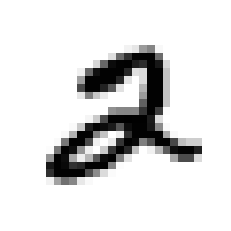

In [29]:
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[5]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation = "nearest")
plt.axis("off")
plt.show()

the picture above shows a 2 and that is what the label tells us

In [15]:
y[5]

'2'

our label type is string, we will convert that into integer since thats our favorite type for machine learning

In [17]:
import numpy as np

y = y.astype(np.uint8)

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Training a classifier

Let's first try to train a model that can classify one digit instead of classifying all the digits, Let's train a classifier that can recognie the number 3 which means it only classifies the digits as number 3 or not

In [31]:
y_train_2 = (y_train == 2)
y_test_2 = (y_test == 2)

Let's use SDG (Stochastic Gradient Descent) this algorithm works well with large datasets 

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 13)
sgd_clf.fit(X_train, y_train_2)

sgd_clf.predict([some_digit])

array([ True])

As we can see, the classifier was able to recognize 2

### Evaluating the model

Let's use a 3 fold cross validation to evaluate our model

In [33]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_2, cv=3, scoring = "accuracy")

array([0.96415, 0.9551 , 0.975  ])

The accuracy is great, however, accuracy is not always the best metric to measure model's performance, Let's look at some more interesting performance measures

In [35]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_2, cv=3)

In [36]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_2, y_train_pred)

array([[52661,  1381],
       [  734,  5224]], dtype=int64)

Let's check the precision and recall for this one

In [39]:
from sklearn.metrics import precision_score, recall_score

print("The precision is:", round(precision_score(y_train_2, y_train_pred), 2))
print("The recall is:", round(recall_score(y_train_2, y_train_pred), 2))      

The precision is: 0.79
The recall is: 0.88


Let's check the f1 score which is the harmonic mean of precision and recall which is often very useful

In [40]:
from sklearn.metrics import f1_score

print("The f1 score is:", round(f1_score(y_train_2, y_train_pred), 2))


The f1 score is: 0.83


Let's check another metric that is useful to measure the performance of our classifier, that is the AUC

In [48]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_2, y_train_pred)

0.9256250490787946

Let's use a random forest classifier and compared to the SGD classifier

In [50]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=13)

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_2, cv=3,
method="predict_proba")

Calculating the roc_auc score

In [57]:
roc_auc_score(y_train_2, y_scores_forest)

0.9974797817728057

This was a binary class classification, let's see how it goes for a multiclass classification using SGD

In [60]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([2], dtype=uint8)

This is actually the correct class since the image before was a 2, Let's use cross validation and see how accurate is our model

In [61]:
sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv= 5, scoring="accuracy")

In [64]:
print("score:", sgd_score)
print("The mean score:", round(sgd_score.mean(), 2))
print("The standard deviation:", round(sgd_score.std(), 2))

score: [0.87483333 0.86025    0.87366667 0.86191667 0.86608333]
The mean score: 0.87
The standard deviation: 0.01


That's a pretty good accuracy but maybe we can do more if we scale the features

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
sgd_score_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv= 5, scoring="accuracy")

In [69]:
print("score:", sgd_score_scaled)
print("The mean score:", round(sgd_score_scaled.mean(), 2))
print("The standard deviation:", round(sgd_score_scaled.std(), 2))

score: [0.90175    0.892      0.89258333 0.89066667 0.90125   ]
The mean score: 0.9
The standard deviation: 0.0


Nice, there has been about 3% increase in the accuracy, Let's take a look at the confusion matrix for this problem

In [72]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=5)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5566,    0,   14,    5,    9,   39,   36,    5,  248,    1],
       [   0, 6404,   40,   21,    3,   41,    4,    7,  215,    7],
       [  25,   25, 5215,   80,   70,   25,   60,   40,  408,   10],
       [  25,   16,  105, 5198,    0,  182,   25,   40,  474,   66],
       [  10,   13,   37,    8, 5206,    9,   33,   19,  365,  142],
       [  27,   17,   23,  152,   53, 4408,   78,   14,  591,   58],
       [  28,   16,   40,    3,   40,   86, 5545,    8,  152,    0],
       [  18,   11,   49,   23,   50,   15,    4, 5677,  229,  189],
       [  14,   60,   37,   84,    4,  118,   28,    7, 5467,   32],
       [  23,   19,   29,   57,  118,   36,    1,  171,  442, 5053]],
      dtype=int64)

As we can see, our model successfully classified most of our digits, however we can have a better representation of this confusion matrix by plotting it as a heatmap

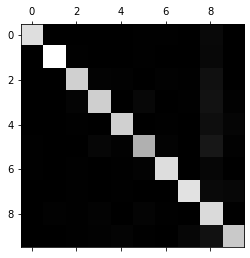

In [74]:
plt.matshow(conf_mx, cmap=plt.cm.gray)

This looks pretty good, our classifier is doing a pretty good job, the 5 though looks a bit darker than the rest 
<br>
A good way to look into this is by dividing the values of the confusion matrix by the total number of observations as follows:


In [77]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

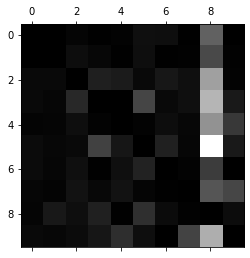

In [79]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

That's more like it since it helps us identify where the classifier was having a hard time, for this case, it looks like many images get misclassified as 8, mainly 5
<br>
As we can see this gives us good isights that help us come out with methods to reduce this error, for example, we can add a new features such as how many loops does a digit have (6 has one loop, 8 has two loops, 5 has none)
<br>
Also we can also try other classifiers that might do a better job than SGD